In [1]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('/kaggle/input/employee-turnover/data.csv')

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


# Handling Mising Values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [6]:
# left is object instead of numeric

In [7]:
data.left.unique()

array(['0', '1', '?'], dtype=object)

In [8]:
# Convert ? to np.nan
# missing_values=['?','','n/a','-','--']
# df= pd.read_csv("data.csv",na_values=missing_values)

In [9]:
import numpy as np
data.replace(['?','','n/a','-','--'],np.nan,inplace=True)

In [10]:
data.left.unique()

array(['0', '1', nan], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15000 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [12]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'age'],
      dtype='object')

In [13]:
# Check for  null values
data.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         4
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

In [14]:
data.dropna(subset=['left'],inplace=True) # delete rows which don't have label

In [15]:
data.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11922
dtype: int64

In [16]:
data.left.unique()

array(['0', '1'], dtype=object)

In [17]:
# Age column is not required as it has more than 70% missing values
data.drop(columns=['age'],axis=1,inplace=True)
# data.drop(columns=['age'],axis=columns,inplace=True)

In [18]:
data.isna().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
Department                0
salary                   29
dtype: int64

In [19]:
# incase of data missed less than 70%, mean(normally distributed without outlier), 
#median(normally distributed with outlier) or mode (category) is used.
data.salary.fillna(data.salary.mode().values[0],inplace=True)

In [20]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [21]:
data.shape

(15000, 10)

# Data Exploration

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='left', ylabel='count'>

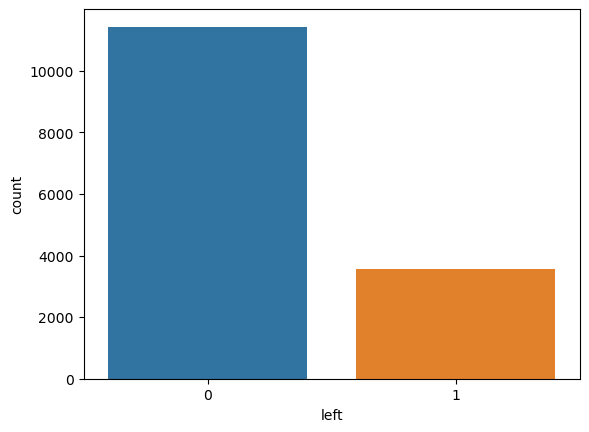

In [22]:
import seaborn as sns
sns.countplot(x='left',data=data)

In [23]:
# This count plot shows that given dataset is unbalnced. The data set is dominated by negative class (0).

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


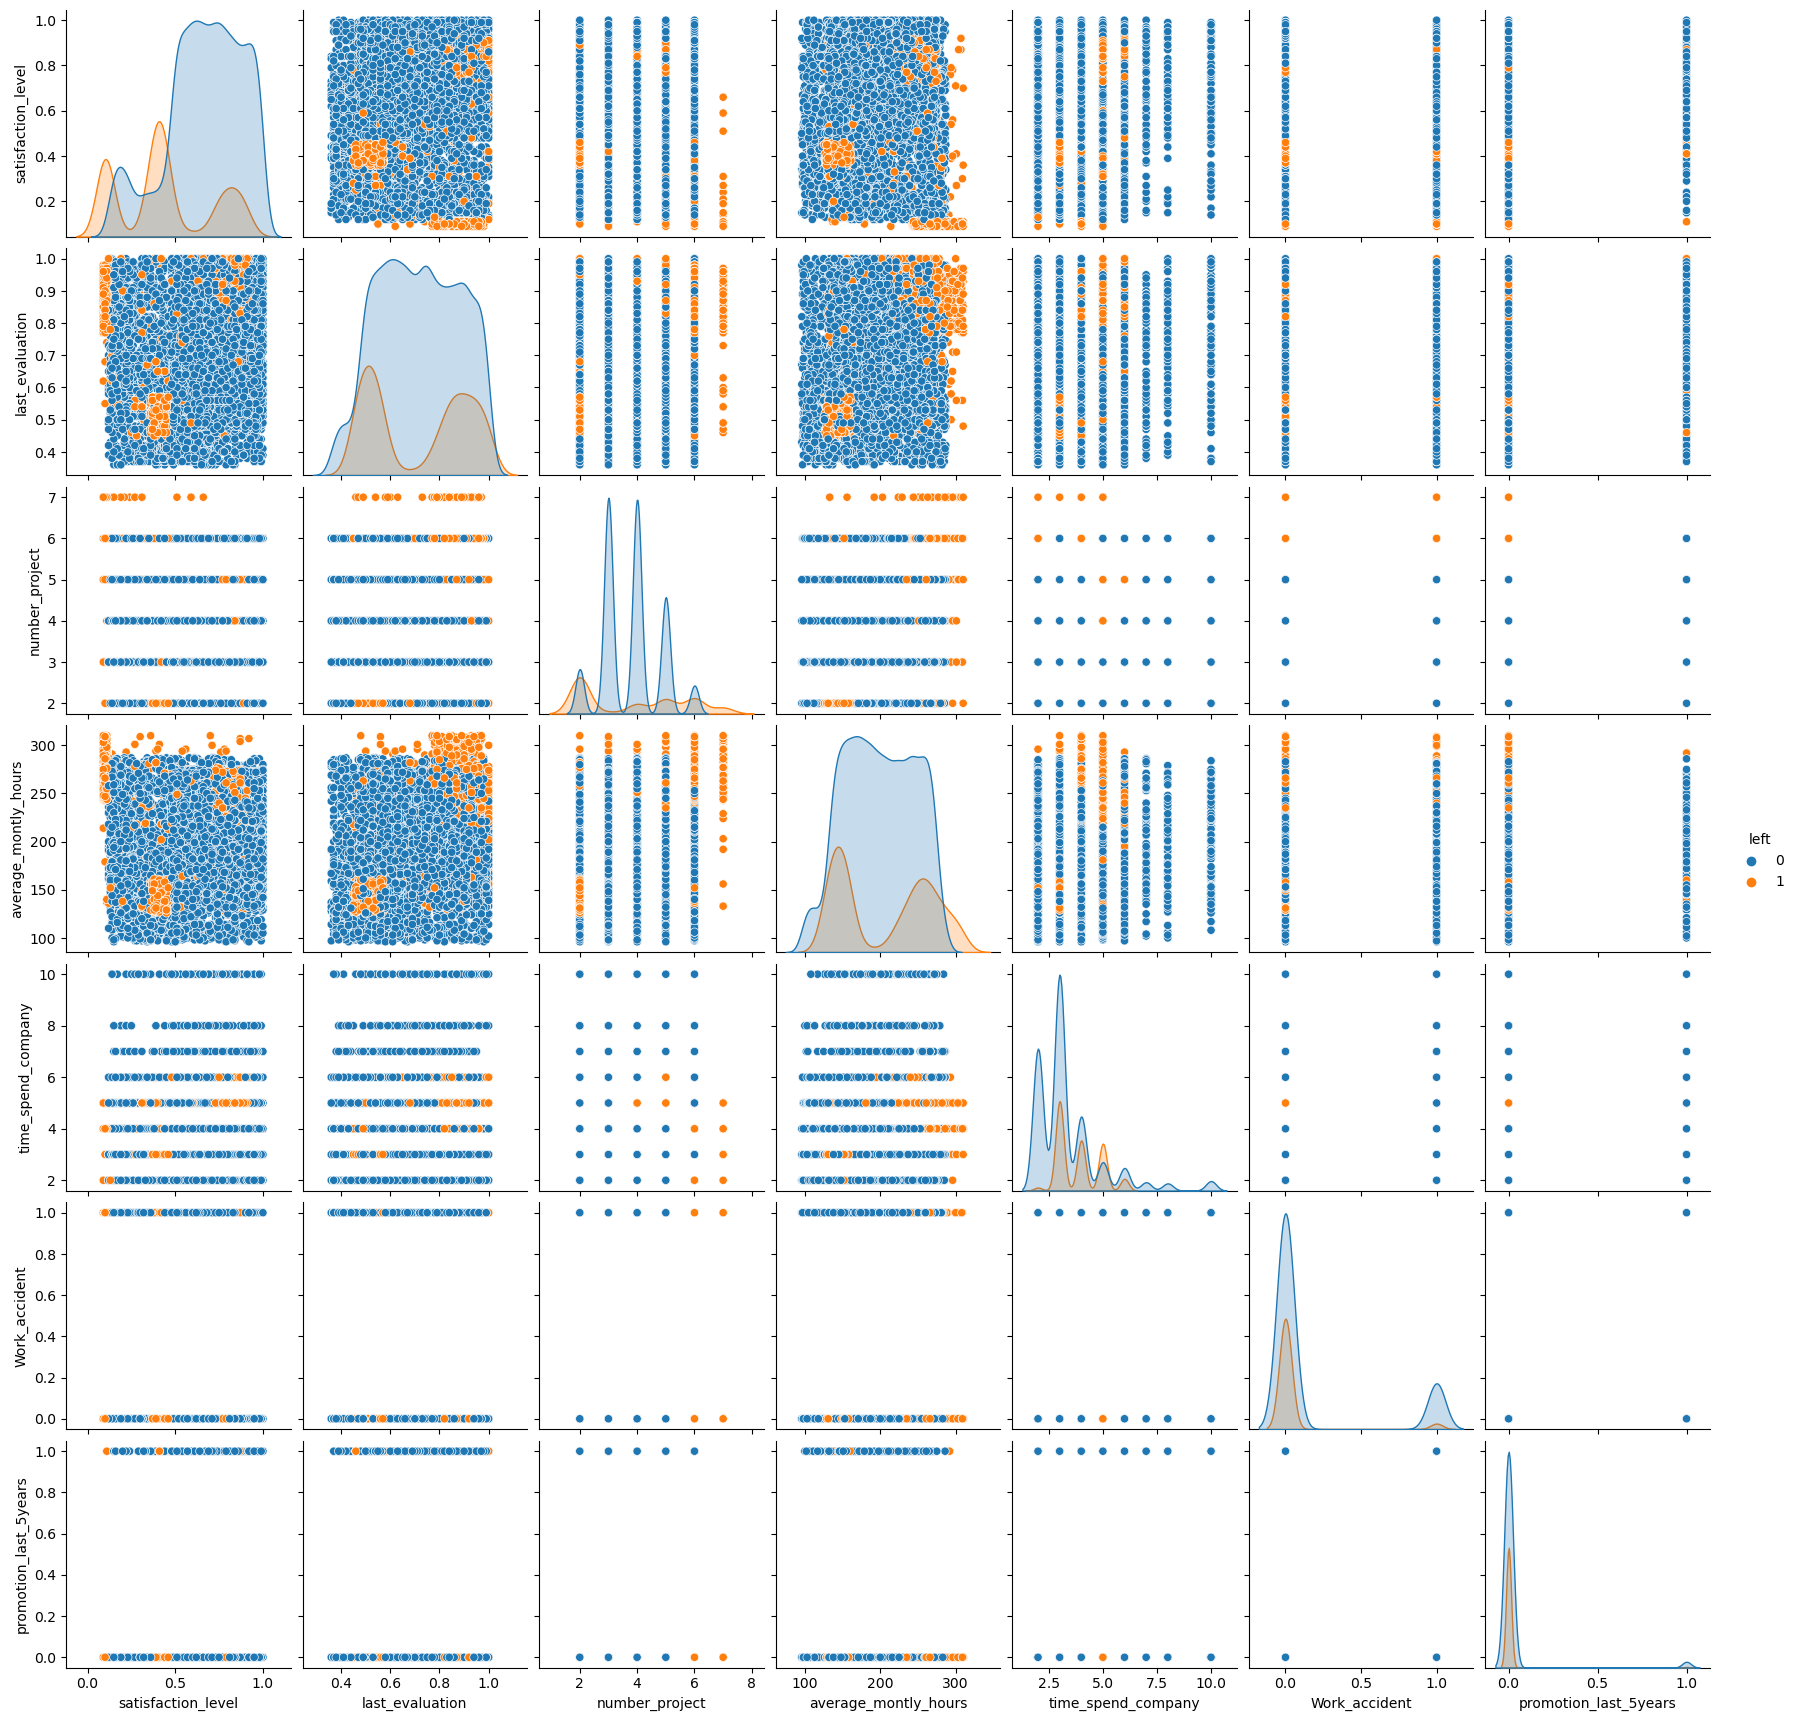

In [24]:
# Pairplot over target variable
sns.pairplot(data,hue='left')

In [25]:
# In scatterplot no single line can perfectly separate the data into respective class.
# So, non-linear models like DecisionTree, RandomForest, etc. may give better result than linear models
# like LogisticRegression.

# Impact of salary on employee retention

<Axes: xlabel='salary', ylabel='count'>

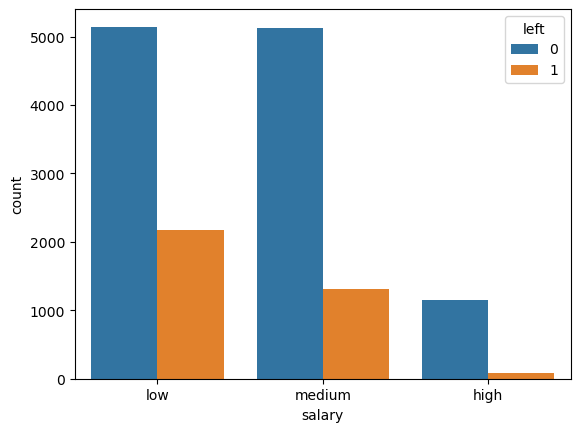

In [26]:
sns.countplot(x='salary',hue='left',data=data)

In [27]:
# from the plot above, we can draw an insiht that low paid employee
# are more likely to leave.

# Impact of Department on Employee Retention

<Axes: xlabel='Department', ylabel='count'>

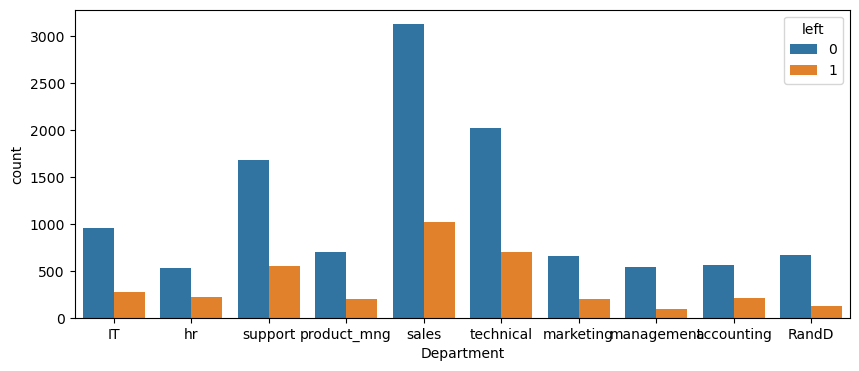

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.countplot(x='Department', hue='left', data=data)

In [29]:
# above plot shows that the ratio of employee retention vs resignition per department
# is almost same. So department the employee is working for might not be a major factor 
# for employee retention.

# Conclusion drawn from Data Exploration

In [30]:
# So, we will be using following variables as independent variables for our model.
data=data[['satisfaction_level','promotion_last_5years','salary','left']]
data.head()

,satisfaction_level,promotion_last_5years,salary,left
0,0.24,0,low,0
1,0.40,0,medium,1
2,0.45,0,medium,1
3,0.46,0,high,0
4,0.14,0,high,0


# Handling Categorical Variables
salary has non numeric value (hot encoding: use dummy variables)

In [31]:
salary=pd.get_dummies(data['salary'],dtype=int)
salary.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0


In [32]:
salary=pd.get_dummies(data['salary'],dtype=int)
data=pd.concat([data,salary],axis='columns')
data.head()

,satisfaction_level,promotion_last_5years,salary,left,high,low,medium
0,0.24,0,low,0,0,1,0
1,0.40,0,medium,1,0,0,1
2,0.45,0,medium,1,0,0,1
3,0.46,0,high,0,1,0,0
4,0.14,0,high,0,1,0,0


In [33]:
data.drop(['salary'],axis='columns',inplace=True)
data.head()


,satisfaction_level,promotion_last_5years,left,high,low,medium
0,0.24,0,0,0,1,0
1,0.40,0,1,0,0,1
2,0.45,0,1,0,0,1
3,0.46,0,0,1,0,0
4,0.14,0,0,1,0,0


# Training and Testing Model
This is binary classification---> will use all the classification algorithms, first make train and test sets.

In [34]:
x=data.drop('left',axis=1) # Feature
y=data['left'] # Lable

# Train-Test split of data

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
del data,salary,x,y
# to free up memory usage

# Train and Evaluation function

In [37]:
def train(x_train,y_train,model,hyperparameters): # this function returns best model and 
    # list of hyperparameters
    # model: logsticRegression, KNeighborsClassifier, etc.)
    # hyperparameters: deals with variables within models
    
    # Perform grid search with cross-validation
    grid_search=GridSearchCV(estimator=model, param_grid=hyperparameters, cv=5) # CV 5 allows to check in every train data 5 times
    # and throws an average error (average MSE) from which the best combination of hyperparameters is selected.
    grid_search.fit(x_train,y_train)
    
    # Print the best hyperparameters found
    best_params = grid_search.best_params_
    print('best hyperparameters: ',best_params)
    
    # Train the model with best hyperparameters
    best_model=model.set_params(**best_params)
    best_model.fit(x_train,y_train)
    
    return best_params,best_model

In [38]:
def evaluate_model(x_test, y_test, best_model):
    # measure with test data
    # returns f1 score
    
    # prediction of test set
    y_pred=best_model.predict(x_test)
    
    # calculate evaluation metrics
    accuracy=accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred,pos_label='1')
    recall=recall_score(y_test,y_pred,pos_label='1')
    f1=f1_score(y_test,y_pred,pos_label='1')
    
    print('accuracy: ',accuracy)
    print('precision: ',precision)
    print('recall: ',recall)
    print('f1score: ',f1)
    
    return accuracy,precision,recall,f1

# K - Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [40]:
hyperparameters={
    'n_neighbors': [7,9,10,11],
    'weights': ['uniform', 'distance']
}
model=KNeighborsClassifier()
_,best_model = train(x_train, y_train, model, hyperparameters)
scores=evaluate_model(x_test, y_test, best_model)

best hyperparameters:  {'n_neighbors': 11, 'weights': 'distance'}
accuracy:  0.8936666666666667
precision:  0.8523985239852399
recall:  0.6590584878744651
f1score:  0.7433628318584071


# Naive Bayes Classifier

In [41]:
from sklearn.naive_bayes import GaussianNB
hyperparameters={
    'var_smoothing': [10**(-x) for x in range(1,11)]
}
model = GaussianNB() # numeric so GNB, boolean --->BNB
_,best_model = train(x_train, y_train, model, hyperparameters)
scores=evaluate_model(x_test, y_test, best_model)

best hyperparameters:  {'var_smoothing': 0.1}
accuracy:  0.816
precision:  0.6219312602291326
recall:  0.5420827389443652
f1score:  0.5792682926829268


# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
hyperparameters={
    'C': [0.01,0.1,1,10,100],
    'penalty': ['l1', 'l2'],
    'solver':['liblinear']
}
model=LogisticRegression()
_,best_model = train(x_train, y_train, model, hyperparameters)
scores=evaluate_model(x_test, y_test, best_model)

best hyperparameters:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy:  0.7893333333333333
precision:  0.7169811320754716
recall:  0.16262482168330955
f1score:  0.2651162790697674


# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
hyperparameters={
    'max_depth': [3,5,7,9],
    'min_samples_split': [2,5,10],
}
model=DecisionTreeClassifier()
_,best_model = train(x_train, y_train, model, hyperparameters)
scores=evaluate_model(x_test, y_test, best_model)

best hyperparameters:  {'max_depth': 7, 'min_samples_split': 2}
accuracy:  0.8956666666666667
precision:  0.8527272727272728
recall:  0.6690442225392297
f1score:  0.7498001598721022


# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
hyperparameters={
    'n_estimators': [100,200,300],
    'max_depth': [3,5,7,9],
    'min_samples_split': [2,5,10],
}
model=RandomForestClassifier()
_,best_model = train(x_train, y_train, model, hyperparameters)
scores=evaluate_model(x_test, y_test, best_model)

best hyperparameters:  {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 100}
accuracy:  0.8963333333333333
precision:  0.8558394160583942
recall:  0.6690442225392297
f1score:  0.7510008006405124


# RandomForest has perfect f1 score